EE562: AI for Engineers
IPython Notebook for Assignment 4 - NN based models training

 Required packages:
* matplotlib - for plotting
* seaborn - for visualization
* keras - for loading Fashion-MNIST dataset and utility functions
* tensorflow - for the neural network based models
* sklearn - for feature normalization and metrics
* pickle - for saving data
* pylab - for plotting
* numpy - for array operations
* h5py - to save the models

This script was executed on Google Colab



This cell imports the data and the required packages

In [0]:
print("Started")

!pip install -q -U tensorflow>=1.8.0
!pip install h5py
import tensorflow as tf

import numpy as np
import keras
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

Started
32768/29515 [=================================] - 0s 0us/step


Using TensorFlow backend.


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


This cell is to connect Google Drive to Colab's workspace

In [0]:
from google.colab import drive


drive.mount('/gdrive')




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


This cell, and the next, is to format the data

In [0]:
import pickle
filepathn='/gdrive/My Drive/AI_EE562/val_indices'

with open(filepathn, 'rb') as f:
    x = pickle.load(f)
    
#print(x)
x_valid = np.array([x_train[i] for i in x])
y_valid = np.array([y_train[i] for i in x])

x_t=[]
y_t=[]
for i in range(60000):
  if i not in x:
    x_t.append(x_train[i])
    y_t.append(y_train[i])

x_train = np.array(x_t)
y_train = np.array(y_t)


In [0]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
50000 train set
10000 validation set
10000 test set


This cell is to build the model for initial experiments

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

This cell compiles the above model

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

This cell trains the above model

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best.hdf5', verbose = 1, save_best_only=True), EarlyStopping(monitor='val_loss', min_delta=0, patience=1, verbose=1, mode='auto', baseline=None, restore_best_weights=False)]
                
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=1,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)



Train on 55000 samples, validate on 5000 samples
Epoch 1/1
54976/55000 [============================>.] - ETA: 0s - loss: 0.3790 - acc: 0.8612
Epoch 00001: val_loss improved from inf to 0.29805, saving model to /gdrive/My Drive/AI_EE562/model.weights.best.hdf5
55000/55000 [==============================] - 90s 2ms/step - loss: 0.3789 - acc: 0.8612 - val_loss: 0.2981 - val_acc: 0.8854


In [0]:
# Load the weights with the best validation accuracy
model.load_weights('/gdrive/My Drive/AI_EE562/model.weights.best.hdf5')

This cell tests the above model - preliminary model

In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8695


In [0]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8575


Grid Search - Batch Size

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)


batch_size = [32, 64, 128, 256, 512]
epochs = [5]
param_grid = dict(batch_size=batch_size, epochs=epochs)
#param_grid = dict(epochs=[1,2,3])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
#print("Grid search done")
grid_result = grid.fit(x_train,
         y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
36666/36666 [==============================] - 63s 2ms/step - loss: 0.6153 - acc: 0.7728
Epoch 2/5
36666/36666 [==============================] - 63s 2ms/step - loss: 0.4275 - acc: 0.8462
Epoch 3/5
36666/36666 [==============================] - 62s 2ms/step - loss: 0.3810 - acc: 0.8615
Epoch 4/5
36666/36666 [==============================] - 62s 2ms/step - loss: 0.3530 - acc: 0.8716
Epoch 5/5
36666/36666 [==============================] - 13s 355us/step
Epoch 1/5
36667/36667 [==============================] - 63s 2ms/step - loss: 0.6187 - acc: 0.7712
Epoch 2/5
36667/36667 [==============================] - 63s 2ms/step - loss: 0.4301 - acc: 0.8421
Epoch 3/5
36667/36667 [==============================] - 63s 2ms/step - loss: 0.3858 - acc: 0.8581
Epoch 4/5
36667/36667 [==============================] - 63s 2ms/step - loss: 0.3551 - acc: 0.8692
Epoch 5/5
36667/36667 [==============================] - 13s 367us/step
Epoch 1/5
36667/36667 [==============================] - 64s 2ms

Grid Search - Optimizer

In [0]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

optimlist  = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
scorelist = []

for optimiz in optimlist:

  model.compile(loss='categorical_crossentropy',
              optimizer=optimiz,
              metrics=['accuracy'])

  from keras.callbacks import ModelCheckpoint

  checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=0, save_best_only=True)
  model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=5,
         validation_data=(x_valid, y_valid), verbose=1,
         callbacks=[checkpointer])

  model.load_weights('model.weights.best.hdf5')

  score = model.evaluate(x_test, y_test, verbose=0)
  scorelist.append(score[1])

  print('\n', optimiz, 'Test accuracy:', score[1])
  
for i in range(len(scorelist)):
  print('\n', optimlist[i], 'Test accuracy:', scorelist[i])
  



Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 100s 2ms/step - loss: 1.1158 - acc: 0.5721 - val_loss: 0.7232 - val_acc: 0.7152
Epoch 2/5
55000/55000 [==============================] - 95s 2ms/step - loss: 0.7455 - acc: 0.7139 - val_loss: 0.5929 - val_acc: 0.7666
Epoch 3/5
55000/55000 [==============================] - 94s 2ms/step - loss: 0.6353 - acc: 0.7575 - val_loss: 0.5287 - val_acc: 0.7920
Epoch 4/5
55000/55000 [==============================] - 94s 2ms/step - loss: 0.5764 - acc: 0.7821 - val_loss: 0.4810 - val_acc: 0.8182
Epoch 5/5
55000/55000 [==============================] - 94s 2ms/step - loss: 0.5459 - acc: 0.7951 - val_loss: 0.4535 - val_acc: 0.8312

 SGD Test accuracy: 0.8324
Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 101s 2ms/step - loss: 0.4957 - acc: 0.8215 - val_loss: 0.3729 - val_acc: 0.8650
Epoch 2/5
55000/55000 [==============================] -

Grid Search - Learning Rate

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(learn_rate=0.01, momentum=0):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
  
    return model

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=1)

learn_rate = [0.001, 0.01, 0.1]
momentum = [0.0, 0.2, 0.4, 0.6, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)

grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(x_train[0:10000],
         y_train[0:10000])

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
6666/6666 [==============================] - 16s 2ms/step - loss: 1.0974 - acc: 0.5866
Epoch 2/5
6666/6666 [==============================] - 12s 2ms/step - loss: 0.6804 - acc: 0.7435
Epoch 3/5
6666/6666 [==============================] - 12s 2ms/step - loss: 0.5952 - acc: 0.7762
Epoch 4/5
6666/6666 [==============================] - 12s 2ms/step - loss: 0.5535 - acc: 0.7894
Epoch 5/5
6666/6666 [==============================] - 3s 439us/step
Epoch 1/5
6667/6667 [==============================] - 16s 2ms/step - loss: 1.0807 - acc: 0.5950
Epoch 2/5
6667/6667 [==============================] - 13s 2ms/step - loss: 0.6789 - acc: 0.7477
Epoch 3/5
6667/6667 [==============================] - 13s 2ms/step - loss: 0.5898 - acc: 0.7767
Epoch 4/5
6667/6667 [==============================] - 13s 2ms/step - loss: 0.5440 - acc: 0.7915
Epoch 5/5
6667/6667 [==============================] - 3s 410us/step
Epoch 1/5
6667/6667 [==============================] - 16s 2ms/step - loss: 1.0785 - a

Grid Search:  Initialization

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(init_mode='uniform'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, kernel_initializer=init_mode, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))
	  model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['accuracy'])
  
    return model

model = KerasClassifier(build_fn=create_model, epochs=5, batch_size=32, verbose=1)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)

#param_grid = dict(epochs=[1,2,3])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
#print("Grid search done")
grid_result = grid.fit(x_train[0:10000],
         y_train[0:10000])

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/5
6666/6666 [==============================] - 12s 2ms/step - loss: 1.1747 - acc: 0.5437
Epoch 2/5
6666/6666 [==============================] - 11s 2ms/step - loss: 0.7516 - acc: 0.7069
Epoch 3/5
6666/6666 [==============================] - 12s 2ms/step - loss: 0.6512 - acc: 0.7522
Epoch 4/5
6666/6666 [==============================] - 12s 2ms/step - loss: 0.5890 - acc: 0.7762
Epoch 5/5
6666/6666 [==============================] - 2s 367us/step
Epoch 1/5
6667/6667 [==============================] - 13s 2ms/step - loss: 1.1806 - acc: 0.5472
Epoch 2/5
6667/6667 [==============================] - 12s 2ms/step - loss: 0.7975 - acc: 0.6970
Epoch 3/5
6667/6667 [==============================] - 12s 2ms/step - loss: 0.7086 - acc: 0.7188
Epoch 4/5
6667/6667 [==============================] - 12s 2ms/step - loss: 0.6500 - acc: 0.7441
Epoch 5/5
6667/6667 [==============================] - 3s 375us/step
Epoch 1/5
6667/6667 [==============================] - 13s 2ms/step - loss: 1.1752 - a

Running the model based on the obtained hyperparameters: 

In [0]:
model = tf.keras.Sequential()

init_mode = 'lecun_uniform'

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, kernel_initializer=init_mode, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='Nadam',
             metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best.hdf5', verbose = 1, save_best_only=True), EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto', baseline=None, restore_best_weights=False)]
                
model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)

score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_99 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_100 (Dropout)        (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 1568)              0         
__________

Model with tuned hyperparameters, and batch normalization

Model with reduced Conv layers - 1 layer

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               401664    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

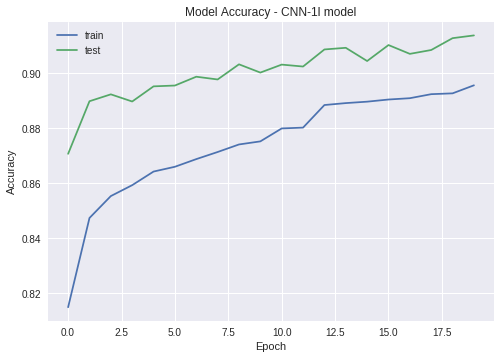

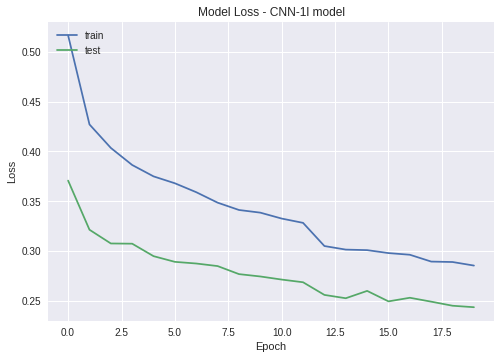

[[875   0  16  29   6   0  69   0   5   0]
 [  0 976   0  18   3   0   1   0   2   0]
 [ 16   0 842  10  64   0  68   0   0   0]
 [ 14   4   8 910  29   0  34   0   1   0]
 [  1   0  46  34 859   0  60   0   0   0]
 [  0   0   0   0   0 977   0  15   0   8]
 [128   0  58  28  70   0 707   0   9   0]
 [  0   0   0   0   0   8   0 958   1  33]
 [  4   1   0   1   2   1   6   5 980   0]
 [  0   0   0   0   0   3   1  26   0 970]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


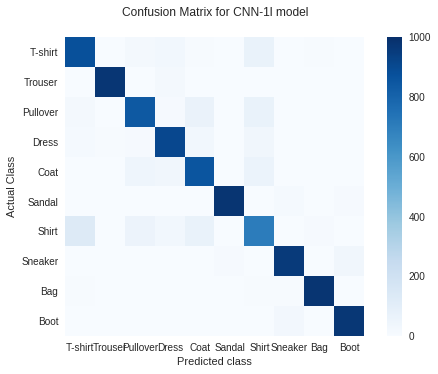

In [0]:
from keras import optimizers

X_train = x_train.reshape((x_train.shape[0], 28,28,1))
X_test = x_test.reshape((x_test.shape[0],28,28,1))
X_valid = x_valid.reshape((x_valid.shape[0], 28,28,1))

model = keras.Sequential()

init_mode = 'lecun_uniform'

#model.add(keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
#model.add(keras.layers.MaxPooling2D(pool_size=2))
#model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=4))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, kernel_initializer=init_mode, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Nadam(),
             metrics=['accuracy'])

model.summary()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best1l.hdf5', verbose = 1, save_best_only=True), learning_rate_reduction]
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)

#model.load_weights('model.weights.best.hdf5')


score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy - CNN-1l model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - CNN-1l model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

import pylab
def plot_confusion_matrix(cm, classes, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1000)
    ax = pylab.axes()
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('Actual Class')
    pylab.show()

classes = np.array(labels)
plot_confusion_matrix(cm, classes, "Confusion Matrix for CNN-1l model")



Model - 2 layers

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 103s 2ms/step - loss: 0.5465 - acc: 0.8015 - val_loss: 0.3785 - val_acc: 0.8612

Epoch 00001: val_loss improved from inf to 0.37848, saving model to /gdrive/My Drive/AI_EE562/model.weights.best2l.hdf5
Epoch 2/20
50000/50000 [==============================] - 98s 2ms/step - loss: 0.4234 - acc: 0.8474 - val_loss: 0.3237 - val_acc: 0.8825

Epoch 00002: val_loss improved from 0.37848 to 0.32372, saving model to /gdrive/My Drive/AI_EE562/model.weights.best2l.hdf5
Epoch 3/20
50000/50000 [==============================] - 98s 2ms/step - loss: 0.3813 - acc: 0.8639 - val_loss: 0.3148 - val_acc: 0.8868

Epoch 00003: val_loss improved from 0.32372 to 0.31476, saving model to /gdrive/My Drive/AI_EE562/model.weights.best2l.hdf5
Epoch 4/20
50000/50000 [==============================] - 98s 2ms/step - loss: 0.3586 - acc: 0.8704 - val_loss: 0.2686 - val_acc: 0.9034

Epoch 00004: val_loss improve

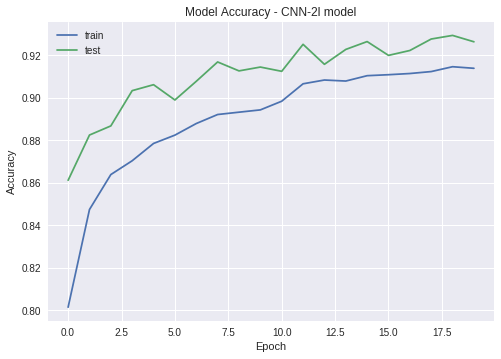

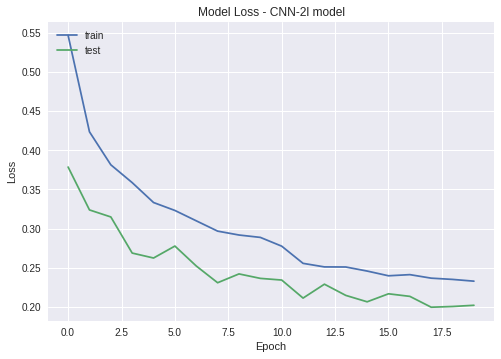

[[881   0  20  20   2   1  70   0   6   0]
 [  0 984   0  11   0   0   4   0   1   0]
 [ 16   1 900   7  21   0  54   0   1   0]
 [  9   3   5 947  12   0  24   0   0   0]
 [  0   0  57  39 837   0  67   0   0   0]
 [  0   0   0   0   0 981   0  13   0   6]
 [ 97   1  53  33  50   0 759   0   7   0]
 [  0   0   0   0   0   4   0 985   0  11]
 [  1   0   3   4   1   1   2   3 985   0]
 [  0   0   0   0   0   5   1  45   0 949]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


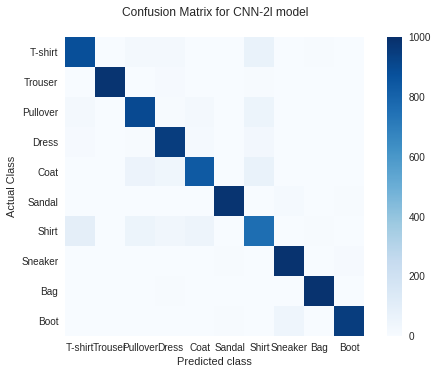

In [0]:
from keras import optimizers
X_train = x_train.reshape((x_train.shape[0], 28,28,1))
X_test = x_test.reshape((x_test.shape[0],28,28,1))
X_valid = x_valid.reshape((x_valid.shape[0], 28,28,1))


model = keras.Sequential()

init_mode = 'lecun_uniform'

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, kernel_initializer=init_mode, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Nadam(),
             metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best2l.hdf5', verbose = 1, save_best_only=True), learning_rate_reduction]
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)

#model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy - CNN-2l model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - CNN-2l model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

import pylab
def plot_confusion_matrix(cm, classes, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1000)
    ax = pylab.axes()
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('Actual Class')
    pylab.show()

classes = np.array(labels)
plot_confusion_matrix(cm, classes, "Confusion Matrix for CNN-2l model")



Model with 3 layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 7, 7, 32)          4128      
__________

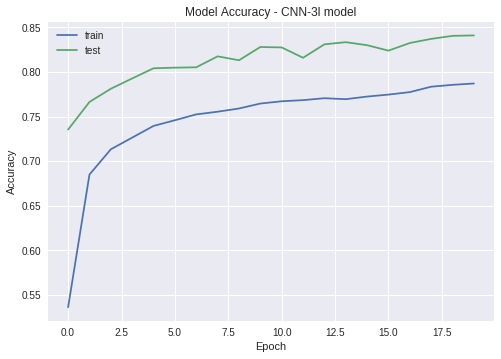

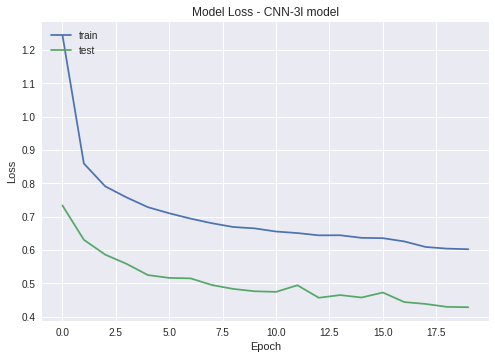

[[853   1  33  43  10   3  47   0  10   0]
 [  4 957   5  15   5   0  10   0   4   0]
 [ 14   0 753   6 143   0  83   0   1   0]
 [ 31   4  19 858  63   0  23   0   0   2]
 [  3   0  37  39 749   0 169   0   3   0]
 [  0   0   0   4   0 934   0  48   0  14]
 [263   0  84  33 153   1 449   0  17   0]
 [  0   0   0   0   0  17   0 943   0  40]
 [  2   0  15   6  10   4  12   3 944   4]
 [  0   0   1   1   0  11   0  46   1 940]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


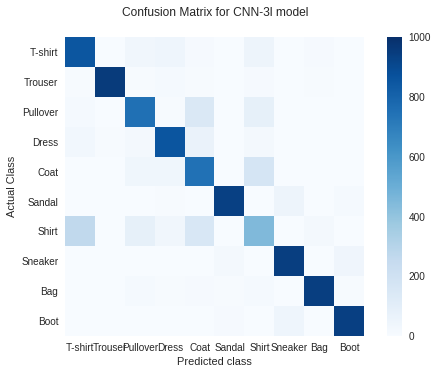

In [0]:
from keras import optimizers

X_train = x_train.reshape((x_train.shape[0], 28,28,1))
X_test = x_test.reshape((x_test.shape[0],28,28,1))
X_valid = x_valid.reshape((x_valid.shape[0], 28,28,1))


model = keras.Sequential()

init_mode = 'lecun_uniform'

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))


model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=4))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, kernel_initializer=init_mode, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))


model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Nadam(),
             metrics=['accuracy'])

model.summary()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best3l.hdf5', verbose = 1, save_best_only=True), learning_rate_reduction]
history = model.fit(x_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(x_valid, y_valid),
         callbacks=checkpointer)

#model.load_weights('model.weights.best.hdf5')

score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy - CNN-3l model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - CNN-3l model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

import pylab
def plot_confusion_matrix(cm, classes, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1000)
    ax = pylab.axes()
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('Actual Class')
    pylab.show()

classes = np.array(labels)
plot_confusion_matrix(cm, classes, "Confusion Matrix for CNN-3l model")




Model with 4 conv layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 7, 7, 32)          4128      
__________

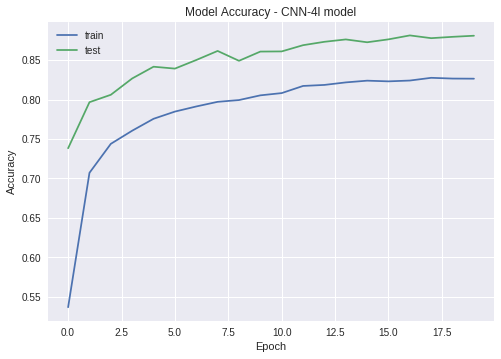

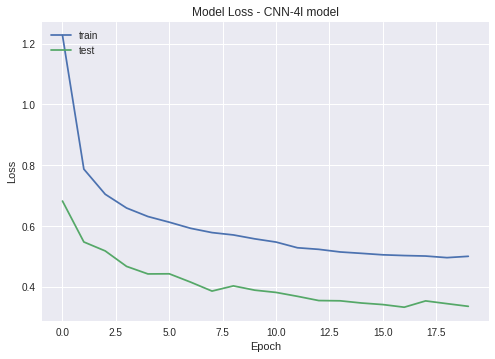

[[839   0  28  43   5   1  77   0   7   0]
 [  0 962   3  21   9   0   5   0   0   0]
 [ 15   1 816   3 111   0  51   0   3   0]
 [ 19   7  13 877  45   1  36   0   2   0]
 [  0   0  42  32 852   0  74   0   0   0]
 [  0   0   0   0   0 948   0  30   0  22]
 [172   1  80  36 115   0 584   0  12   0]
 [  0   0   0   0   0   3   0 984   0  13]
 [  3   1   4   4   3   1  13   3 965   3]
 [  0   0   0   1   0   2   0  54   2 941]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


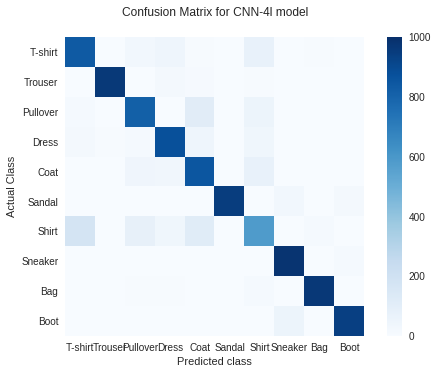

In [0]:
from keras import optimizers

X_train = x_train.reshape((x_train.shape[0], 28,28,1))
X_test = x_test.reshape((x_test.shape[0],28,28,1))
X_valid = x_valid.reshape((x_valid.shape[0], 28,28,1))

model = keras.Sequential()

init_mode = 'lecun_uniform'

model.add(keras.layers.Conv2D(filters=64, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu')) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, kernel_initializer=init_mode, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, kernel_initializer=init_mode, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))



model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Nadam(),
             metrics=['accuracy'])

model.summary()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.best4l.hdf5', verbose = 1, save_best_only=True), learning_rate_reduction]
history = model.fit(X_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(X_valid, y_valid),
         callbacks=checkpointer)

#model.load_weights('model.weights.best.hdf5')

# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy - CNN-4l model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - CNN-4l model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

import pylab
def plot_confusion_matrix(cm, classes, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1000)
    ax = pylab.axes()
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('Actual Class')
    pylab.show()

classes = np.array(labels)
plot_confusion_matrix(cm, classes, "Confusion Matrix for CNN-4l model")




Model without CNN - Neural network based model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_21 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               65664     
_________________________________________________________________
batch_normalization_22 (Batc (None, 128)               512       
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                1290      
Total para

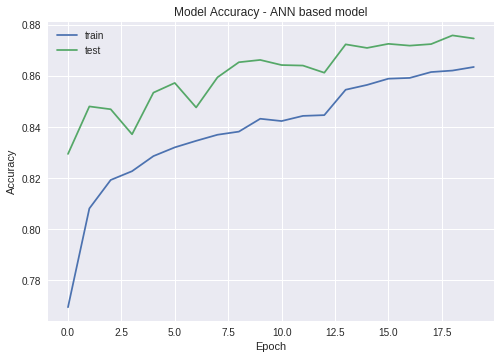

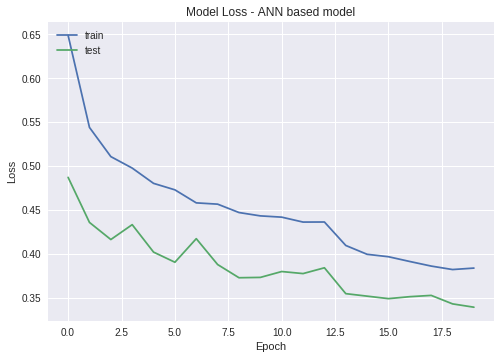

[[820   1   9  38   5   0 118   0   9   0]
 [  3 964   2  23   5   0   1   0   2   0]
 [ 11   1 733  14 158   0  82   0   1   0]
 [ 21   8   7 890  38   0  34   0   2   0]
 [  0   0  85  30 832   0  50   0   3   0]
 [  0   0   0   0   0 931   0  44   1  24]
 [127   2  89  33 111   0 627   0  11   0]
 [  0   0   0   0   0  17   0 970   0  13]
 [  2   1   4   6   5   2   8   5 967   0]
 [  0   0   0   0   0   4   1  47   0 948]]


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


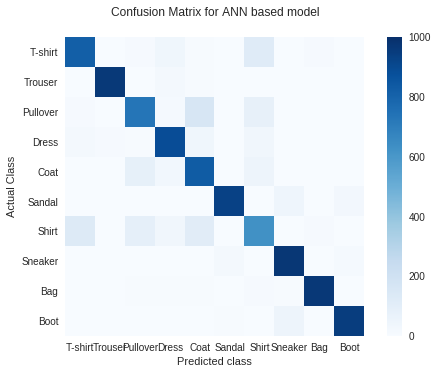

In [0]:
from keras import optimizers


X_train = x_train.reshape((x_train.shape[0], 784))
X_test = x_test.reshape((x_test.shape[0],784))
X_valid = x_valid.reshape((x_valid.shape[0], 784))

model = keras.Sequential()

init_mode = 'lecun_uniform'


model.add(keras.layers.Dense(512,  kernel_initializer=init_mode, activation='relu', input_shape=(784,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, kernel_initializer=init_mode, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, kernel_initializer=init_mode, activation='softmax'))



model.compile(loss='categorical_crossentropy',
             optimizer=optimizers.Nadam(),
             metrics=['accuracy'])

model.summary()

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


checkpointer = [ ModelCheckpoint(filepath='/gdrive/My Drive/AI_EE562/model.weights.bestann.hdf5', verbose = 1, save_best_only=True), learning_rate_reduction]
history = model.fit(X_train,
         y_train,
         batch_size=32,
         epochs=20,
         validation_data=(X_valid, y_valid),
         callbacks=checkpointer)

#model.load_weights('model.weights.best.hdf5')
score = model.evaluate(X_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])

print(history.history.keys())
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy - ANN based model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - ANN based model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from sklearn.metrics import confusion_matrix

Y_pred = model.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']
cm = confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cm)

import pylab
def plot_confusion_matrix(cm, classes, title):
    pylab.clf()
    pylab.matshow(cm, fignum=False, cmap='Blues', vmin=0, vmax=1000)
    ax = pylab.axes()
    ax.set_xticks(range(len(classes)))
    ax.set_xticklabels(classes)
    ax.xaxis.set_ticks_position("bottom")
    ax.set_yticks(range(len(classes)))
    ax.set_yticklabels(classes)
    pylab.title(title)
    pylab.colorbar()
    pylab.grid(False)
    pylab.xlabel('Predicted class')
    pylab.ylabel('Actual Class')
    pylab.show()

classes = np.array(labels)
plot_confusion_matrix(cm, classes, "Confusion Matrix for ANN based model")
